In [62]:
#kütüphaneleri içeri aktarma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [225]:
#veri okuma ve görüntüleme
veri=pd.read_csv(r"petrol_tüketimi.csv", encoding="ISO-8859-1")
print(veri.head())


#veri setinin boyutunu öğrenme
veri.shape

#tanımlayıcı istatistikler
pd.set_option("display.max_columns", None)
veri.describe()


   Petrol_vergi  Ortalama_gelir  Asvalt_Otoban  Ehliyet_orani  Petrol_tüketimi
0           9.0            3571           1976          0.525              541
1           9.0            4092           1250          0.572              524
2           9.0            3865           1586          0.580              561
3           7.5            4870           2351          0.529              414
4           8.0            4399            431          0.544              410


,Petrol_vergi,Ortalama_gelir,Asvalt_Otoban,Ehliyet_orani,Petrol_tüketimi
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [219]:
#eksik veri kontrolü

veri.isnull()


,Petrol_vergi,Ortalama_gelir,Asvalt_Otoban,Ehliyet_orani,Petrol_tüketimi
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


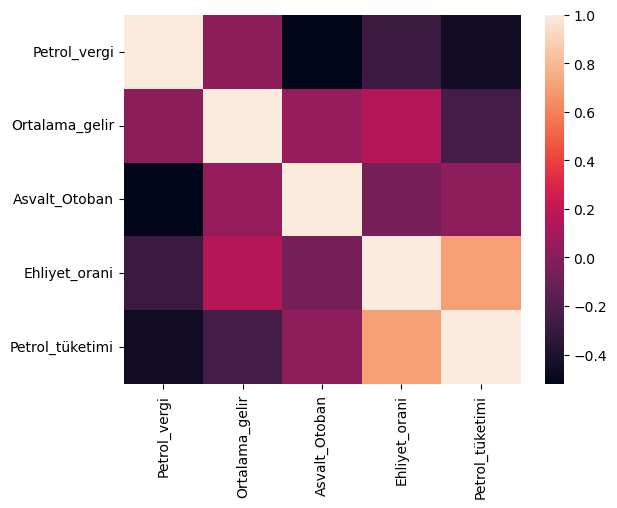

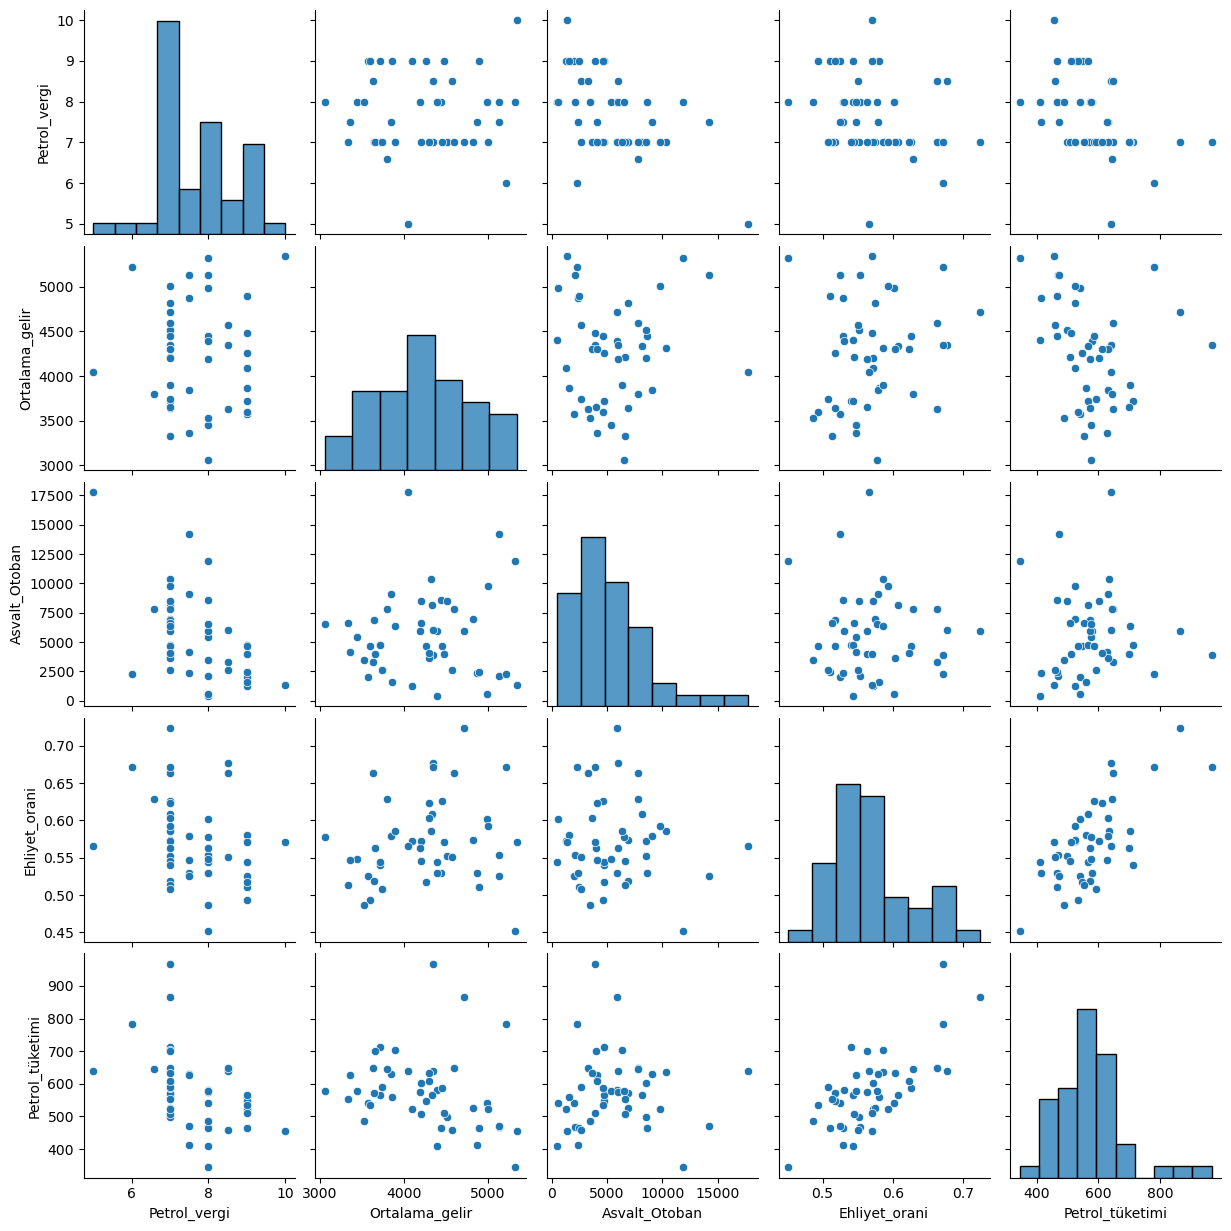

In [220]:
#korelasyonlara bakalım
plt.figure()
cor=veri.corr()
sns.heatmap(cor)
plt.show()

#scotter plot'lar (serpilme grafikleri)
sns.pairplot(veri)

In [238]:

#Hedef ve Öznitelikleri Tanımla
x=veri[['Petrol_vergi', 'Ortalama_gelir', 'Asvalt_Otoban', 'Ehliyet_orani']]
y=veri['Petrol_tüketimi']

#öğrenme ve test verisi ayırımı
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
#Eğititm ve model oluşturma
model=LinearRegression()
model.fit(x_train, y_train)

#modelin intercept ve coefficient'ını görme

print(model.intercept_)
print("*"*6)
print(model.coef_)

361.45087906652986
******
[-3.69937459e+01 -5.65355145e-02 -4.38217137e-03  1.34686930e+03]


In [239]:

# Test verisetinin hedef değişkenini skorlarını Tahmin edelim
tahmin=model.predict(x_train)
for i, prediction in enumerate(tahmin):
    print(f"Tahmin edilen tüketim: {prediction:.2f} iken Gerçek tüketim miktarı: {y[i]}")

#Model ölçütü
r2_score(y_train, tahmin)

Tahmin edilen tüketim: 489.00 iken Gerçek tüketim miktarı: 541
Tahmin edilen tüketim: 510.86 iken Gerçek tüketim miktarı: 524
Tahmin edilen tüketim: 320.22 iken Gerçek tüketim miktarı: 561
Tahmin edilen tüketim: 744.83 iken Gerçek tüketim miktarı: 414
Tahmin edilen tüketim: 612.89 iken Gerçek tüketim miktarı: 410
Tahmin edilen tüketim: 569.86 iken Gerçek tüketim miktarı: 457
Tahmin edilen tüketim: 598.90 iken Gerçek tüketim miktarı: 344
Tahmin edilen tüketim: 527.24 iken Gerçek tüketim miktarı: 467
Tahmin edilen tüketim: 602.33 iken Gerçek tüketim miktarı: 464
Tahmin edilen tüketim: 553.60 iken Gerçek tüketim miktarı: 498
Tahmin edilen tüketim: 597.83 iken Gerçek tüketim miktarı: 580
Tahmin edilen tüketim: 468.55 iken Gerçek tüketim miktarı: 471
Tahmin edilen tüketim: 642.23 iken Gerçek tüketim miktarı: 525
Tahmin edilen tüketim: 680.83 iken Gerçek tüketim miktarı: 508
Tahmin edilen tüketim: 525.07 iken Gerçek tüketim miktarı: 566
Tahmin edilen tüketim: 576.11 iken Gerçek tüketim mikta

0.7068781342155135